In [181]:
#main
import pandas as pd
import numpy as np
import math
import sklearn
import re

#graphic
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [182]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [183]:
def dtype_convert_accident(df):
    to_convert_accident = ['accident_index', 'accident_year', 'accident_reference',
       'police_force', 'accident_severity', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'month']
    
    df[to_convert_accident] = df[to_convert_accident].astype(object)
    
    return df

In [184]:
def dtype_convert_vehicle(df):
    to_convert_vehicle = ['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver',
       'age_band_of_driver', 'propulsion_code','generic_make_model', 'driver_imd_decile',
       'driver_home_area_type']
    
    df[to_convert_vehicle] = df[to_convert_vehicle].astype(object)
    
    return df

In [185]:
def dtype_convert_casualty(df):
    to_convert_casualty = ['accident_index', 'accident_year', 'accident_reference',
                       'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty',
                       'age_band_of_casualty','casualty_severity', 'pedestrian_location', 'pedestrian_movement',
                       'car_passenger', 'bus_or_coach_passenger',
                       'pedestrian_road_maintenance_worker', 'casualty_type','casualty_home_area_type', 'casualty_imd_decile']  

    
    df[to_convert_casualty] = df[to_convert_casualty].astype(object)
    
    return df

# Reading the clean data from the csv files

In [186]:
accident_df = pd.read_csv('accident_clean.csv')
vehicle_df = pd.read_csv('vehicle_clean.csv')
casualty_df = pd.read_csv('casualty_clean.csv')

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_3129/2068054436.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_df = pd.read_csv('accident_clean.csv')
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_3129/2068054436.py:2: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv('vehicle_clean.csv')
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_3129/2068054436.py:3: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  casualty_df = pd.read_csv('casualty_clean.csv')


In [187]:
dtype_convert_accident(accident_df)
dtype_convert_vehicle(vehicle_df)
dtype_convert_casualty(casualty_df)
display(accident_df.dtypes)
display(vehicle_df.dtypes)
display(casualty_df.dtypes)

Unnamed: 0                                       int64
accident_index                                  object
accident_year                                   object
accident_reference                              object
location_easting_osgr                            int64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                    object
accident_severity                               object
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                     object
time                                            object
local_authority_district                        object
local_authority_ons_district                    object
local_authority_highway                         object
first_road

Unnamed: 0                           int64
age_of_driver                        int64
engine_capacity_cc                   int64
age_of_vehicle                       int64
accident_index                      object
accident_year                       object
accident_reference                  object
vehicle_reference                   object
vehicle_type                        object
towing_and_articulation             object
vehicle_manoeuvre                   object
vehicle_direction_from              object
vehicle_direction_to                object
vehicle_location_restricted_lane    object
junction_location                   object
skidding_and_overturning            object
hit_object_in_carriageway           object
vehicle_leaving_carriageway         object
hit_object_off_carriageway          object
first_point_of_impact               object
vehicle_left_hand_drive             object
journey_purpose_of_driver           object
sex_of_driver                       object
age_band_of

Unnamed: 0                             int64
age_of_casualty                        int64
accident_index                        object
accident_year                         object
accident_reference                    object
vehicle_reference                     object
casualty_reference                    object
casualty_class                        object
sex_of_casualty                       object
age_band_of_casualty                  object
casualty_severity                     object
pedestrian_location                   object
pedestrian_movement                   object
car_passenger                         object
bus_or_coach_passenger                object
pedestrian_road_maintenance_worker    object
casualty_type                         object
casualty_home_area_type               object
casualty_imd_decile                   object
dtype: object

In [188]:
accident_df = accident_df.drop(['Unnamed: 0'], axis=1)
vehicle_df = vehicle_df.drop(['Unnamed: 0'], axis=1)
casualty_df = casualty_df.drop(['Unnamed: 0'], axis=1)

In [189]:
display(accident_df.tail())
display(vehicle_df.tail())
display(casualty_df.tail())

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month
597835,2020991027064,2020,991027064,343034,731654.0,-2.926320,56.473539,99,2,2,1,2020-12-08,4,14:30,918.0,S12000042,S12000042,4,959,6.0,30.0,1.0,4.0,4.0,959.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01032739,12
597836,2020991029573,2020,991029573,257963,658891.0,-4.267565,55.802353,99,3,1,1,2020-11-13,6,15:05,922.0,S12000011,S12000011,6,0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,E01032739,11
597837,2020991030297,2020,991030297,383664,810646.0,-2.271903,57.186317,99,2,2,1,2020-04-15,4,12:42,910.0,S12000033,S12000033,4,979,6.0,60.0,8.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,E01032739,4
597838,2020991030900,2020,991030900,277161,674852.0,-3.968753,55.950940,99,3,2,1,2020-12-15,3,14:00,932.0,S12000044,S12000044,6,0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,E01032739,12
597839,2020991032575,2020,991032575,240402,681950.0,-4.561040,56.003843,99,3,1,1,2020-08-25,3,13:50,916.0,S12000039,S12000039,6,0,6.0,30.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,E01032739,8


,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type
1101586,57,1968,2,2020991030297,2020,991030297,1,9.0,0.0,7.0,8.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,9.0,1.0,AUDI A5,7.0,1.0
1101587,38,1301,2,2020991030297,2020,991030297,2,5.0,0.0,16.0,6.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,7.0,1.0,KTM 1290 SUPERDUKE,9.0,2.0
1101588,68,1995,1,2020991030900,2020,991030900,1,9.0,0.0,7.0,8.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0,1.0,5.0,2.0,10.0,1.0,BMW X3,5.0,1.0
1101589,76,1856,7,2020991030900,2020,991030900,2,1.0,0.0,18.0,6.0,2.0,4.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,11.0,1.0,Other,9.0,1.0
1101590,39,999,2,2020991032575,2020,991032575,1,9.0,0.0,1.0,8.0,4.0,0.0,0.0,0.0,12.0,0.0,0.0,2.0,1.0,5.0,1.0,7.0,1.0,FORD FOCUS,7.0,1.0


,age_of_casualty,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
781711,11,2020991027064,2020,991027064,2,1,1,1.0,3.0,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
781712,63,2020991029573,2020,991029573,1,1,3,2.0,9.0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0
781713,38,2020991030297,2020,991030297,2,1,1,1.0,7.0,2,0.0,0.0,0.0,0.0,0.0,5.0,2.0,9.0
781714,76,2020991030900,2020,991030900,2,1,1,1.0,11.0,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0
781715,48,2020991032575,2020,991032575,1,1,3,1.0,8.0,3,9.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [190]:
display(accident_df.shape)
display(vehicle_df.shape)
display(casualty_df.shape)

(597840, 37)

(1101591, 27)

(781716, 18)

In [191]:
vehicle_accident = pd.merge(left = vehicle_df,
                                  right = accident_df,
                                  how = 'inner', 
                                  left_on = 'accident_index', 
                                  right_on= 'accident_index')

display(vehicle_accident.shape)

(963862, 63)

In [192]:
vehicle_accident.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month
0,51,1856,7,2016010000005,2016,010000005,1,8.0,0.0,6.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,8.0,1.0,Other,3.0,1.0,2016,010000005,519310,188730.0,-0.279323,51.584754,1,3,2,1,2016-01-11,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1
1,23,124,4,2016010000005,2016,010000005,2,2.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,4.0,1.0,2016,010000005,519310,188730.0,-0.279323,51.584754,1,3,2,1,2016-01-11,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1
2,36,1461,1,2016010000006,2016,010000006,1,9.0,0.0,18.0,5.0,1.0,0.0,2.0,2.0,10.0,1.0,0.0,4.0,1.0,5.0,2.0,7.0,1.0,Other,10.0,1.0,2016,010000006,551920,174560.0,0.184928,51.449595,1,3,1,1,2016-01-11,3,00:37,18.0,E09000004,E09000004,3,207,6.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000375,1
3,24,1390,5,2016010000008,2016,010000008,1,9.0,0.0,18.0,1.0,8.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,8.0,1.0,2016,010000008,505930,183850.0,-0.473837,51.543563,1,3,1,1,2016-01-11,3,01:25,26.0,E09000017,E09000017,3,4020,1.0,30.0,1.0,4.0,3.0,4020.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01033725,1
4,55,6692,7,2016010000016,2016,010000016,1,11.0,0.0,18.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,1.0,Other,9.0,1.0,2016,010000016,527770,168930.0,-0.164442,51.404958,1,3,1,1,2016-01-11,3,09:15,22.0,E09000024,E09000024,3,217,6.0,30.0,3.0,2.0,3.0,217.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003379,1


In [193]:
all_df = pd.merge(left = vehicle_accident,
                                  right = casualty_df,
                                  how = 'inner', 
                                  left_on = ['accident_index', 'vehicle_reference'], 
                                  right_on= ['accident_index', 'vehicle_reference'])

display(all_df.shape)

(633585, 79)

In [194]:
all_df.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,23,124,4,2016010000005,2016,010000005,2,2.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,4.0,1.0,2016,010000005,519310,188730.0,-0.279323,51.584754,1,3,2,1,2016-01-11,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1,23,2016,010000005,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0
1,36,1461,1,2016010000006,2016,010000006,1,9.0,0.0,18.0,5.0,1.0,0.0,2.0,2.0,10.0,1.0,0.0,4.0,1.0,5.0,2.0,7.0,1.0,Other,10.0,1.0,2016,010000006,551920,174560.0,0.184928,51.449595,1,3,1,1,2016-01-11,3,00:37,18.0,E09000004,E09000004,3,207,6.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000375,1,36,2016,010000006,1,1,2.0,7.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0
2,24,1390,5,2016010000008,2016,010000008,1,9.0,0.0,18.0,1.0,8.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,8.0,1.0,2016,010000008,505930,183850.0,-0.473837,51.543563,1,3,1,1,2016-01-11,3,01:25,26.0,E09000017,E09000017,3,4020,1.0,30.0,1.0,4.0,3.0,4020.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01033725,1,24,2016,010000008,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,8.0
3,55,6692,7,2016010000016,2016,010000016,1,11.0,0.0,18.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,1.0,Other,9.0,1.0,2016,010000016,527770,168930.0,-0.164442,51.404958,1,3,1,1,2016-01-11,3,09:15,22.0,E09000024,E09000024,3,217,6.0,30.0,3.0,2.0,3.0,217.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003379,1,59,2016,010000016,1,2,2.0,9.0,3,0.0,0.0,0.0,3.0,0.0,11.0,1.0,4.0
4,28,1856,7,2016010000018,2016,010000018,2,1.0,0.0,18.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,1.0,6.0,1.0,Other,6.0,1.0,2016,010000018,510740,177230.0,-0.406580,51.483139,1,3,2,1,2016-01-11,3,07:53,25.0,E09000018,E09000018,3,312,3.0,40.0,0.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01002583,1,28,2016,010000018,1,1,1.0,6.0,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0


In [195]:
#all_df.to_csv('merged_accident_vehicle_casualty.csv')

In [196]:
#all_df.dtypes

# Outliers

In [197]:
def plot_boxplot(df): 
    for column in df.columns:
        sns.boxplot(y=df[column])
        plt.show()
    return None


In [198]:
all_df.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,23,124,4,2016010000005,2016,010000005,2,2.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,4.0,1.0,2016,010000005,519310,188730.0,-0.279323,51.584754,1,3,2,1,2016-01-11,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1,23,2016,010000005,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0
1,36,1461,1,2016010000006,2016,010000006,1,9.0,0.0,18.0,5.0,1.0,0.0,2.0,2.0,10.0,1.0,0.0,4.0,1.0,5.0,2.0,7.0,1.0,Other,10.0,1.0,2016,010000006,551920,174560.0,0.184928,51.449595,1,3,1,1,2016-01-11,3,00:37,18.0,E09000004,E09000004,3,207,6.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000375,1,36,2016,010000006,1,1,2.0,7.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0
2,24,1390,5,2016010000008,2016,010000008,1,9.0,0.0,18.0,1.0,8.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,8.0,1.0,2016,010000008,505930,183850.0,-0.473837,51.543563,1,3,1,1,2016-01-11,3,01:25,26.0,E09000017,E09000017,3,4020,1.0,30.0,1.0,4.0,3.0,4020.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01033725,1,24,2016,010000008,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,8.0
3,55,6692,7,2016010000016,2016,010000016,1,11.0,0.0,18.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,1.0,Other,9.0,1.0,2016,010000016,527770,168930.0,-0.164442,51.404958,1,3,1,1,2016-01-11,3,09:15,22.0,E09000024,E09000024,3,217,6.0,30.0,3.0,2.0,3.0,217.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003379,1,59,2016,010000016,1,2,2.0,9.0,3,0.0,0.0,0.0,3.0,0.0,11.0,1.0,4.0
4,28,1856,7,2016010000018,2016,010000018,2,1.0,0.0,18.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,1.0,6.0,1.0,Other,6.0,1.0,2016,010000018,510740,177230.0,-0.406580,51.483139,1,3,2,1,2016-01-11,3,07:53,25.0,E09000018,E09000018,3,312,3.0,40.0,0.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01002583,1,28,2016,010000018,1,1,1.0,6.0,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0


In [199]:
box_df=all_df[['age_of_driver','engine_capacity_cc','age_of_vehicle','number_of_vehicles','number_of_casualties',
                   'age_of_casualty']]

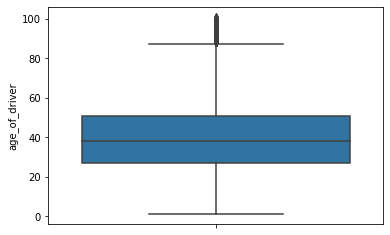

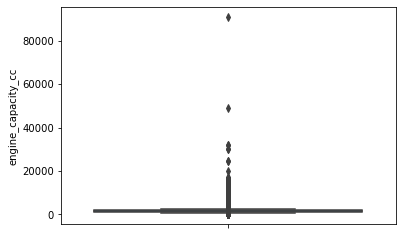

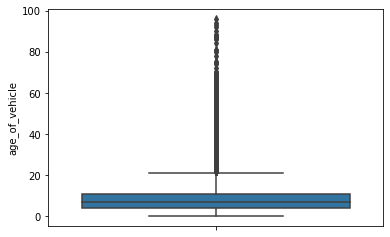

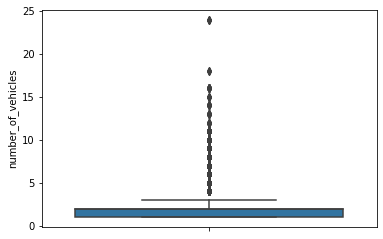

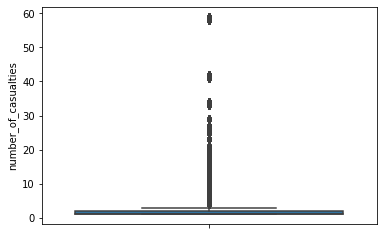

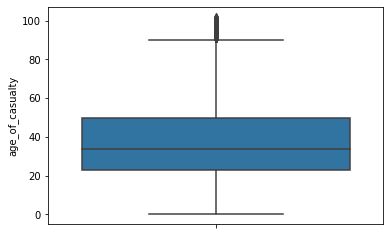

In [119]:
plot_boxplot(box_df)

In [200]:
# Checking how many values will be removed if the outliers are removed
def outliers(df,col):
    iqr = np.nanpercentile(df[col],75) - np.nanpercentile(df[col],25)
    upper_limit = np.nanpercentile(df[col],75) + 1.5*iqr # tentatively calling these outliers.
    extraordinary_points = df[df[col] >upper_limit]
    return upper_limit, len(extraordinary_points)


In [201]:
# age_of_driver
upper_limit_agedriver, total_outliers_agedriver= outliers(box_df,'age_of_driver')
print(upper_limit_agedriver) #does not seem like outlier
print(total_outliers_agedriver)

87.0
2437


In [122]:
# engine_capacity_cc
upper_limit_enginecap, total_outliers_enginecap= outliers(box_df,'engine_capacity_cc')
print(upper_limit_enginecap) 
print(total_outliers_enginecap)

2646.5
33710


In [123]:
# age_of_vehicle
upper_limit_agevehicle, total_outliers_agevehicle= outliers(box_df,'age_of_vehicle')
print(upper_limit_agevehicle) #does not seem like outlier
print(total_outliers_agevehicle)

21.5
5225


In [124]:
# number_of_vehicles
upper_limit_numofvechicles, total_outliers_numofvechicles= outliers(box_df,'number_of_vehicles')
print(upper_limit_numofvechicles) #does not seem like outlier
print(total_outliers_numofvechicles)

3.5
23153


In [125]:
# number_of_casualties
upper_limit_numofcasualties, total_outliers_numofcasualties= outliers(box_df,'number_of_casualties')
print(upper_limit_numofcasualties) #does not seem like outlier
print(total_outliers_numofcasualties)

3.5
52835


In [126]:
# age_of_casualty
upper_limit_agecasualty, total_outliers_agecasualty= outliers(box_df,'age_of_casualty')
print(upper_limit_agecasualty)
print(total_outliers_agecasualty)

90.5
1447


# Logistic Regression Model (using data from only the year 2017)

In [20]:
all_df.shape

(633585, 79)

In [ ]:
#all_df['age_of_vehicle'].value_counts(dropna=False)

In [202]:
all_df.dtypes

age_of_driver                                    int64
engine_capacity_cc                               int64
age_of_vehicle                                   int64
accident_index                                  object
accident_year_x                                 object
accident_reference_x                            object
vehicle_reference                               object
vehicle_type                                    object
towing_and_articulation                         object
vehicle_manoeuvre                               object
vehicle_direction_from                          object
vehicle_direction_to                            object
vehicle_location_restricted_lane                object
junction_location                               object
skidding_and_overturning                        object
hit_object_in_carriageway                       object
vehicle_leaving_carriageway                     object
hit_object_off_carriageway                      object
first_poin

In [203]:
all_df = all_df[all_df.accident_year == 2017]

In [204]:
all_df.shape

(129846, 79)

In [205]:
all_df['accident_severity']= all_df['accident_severity'].replace({1:'Fatal', 2:'Serious', 3:'Slight'})
all_df.dtypes

age_of_driver                                    int64
engine_capacity_cc                               int64
age_of_vehicle                                   int64
accident_index                                  object
accident_year_x                                 object
accident_reference_x                            object
vehicle_reference                               object
vehicle_type                                    object
towing_and_articulation                         object
vehicle_manoeuvre                               object
vehicle_direction_from                          object
vehicle_direction_to                            object
vehicle_location_restricted_lane                object
junction_location                               object
skidding_and_overturning                        object
hit_object_in_carriageway                       object
vehicle_leaving_carriageway                     object
hit_object_off_carriageway                      object
first_poin

In [206]:
# I will remove the outliers in the engine_capacity column

def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean())/column.var()**(1/2))) > threshold]    
    return data


In [208]:
#NoV_outliers = outliers(all_df["number_of_vehicles"])
#NoC_outliers = outliers(all_df["number_of_casualties"])
NoE_outliers = outliers(all_df["engine_capacity_cc"])

In [30]:
#len(NoV_outliers)

865

In [31]:
#len(NoC_outliers)

1268

In [209]:
len(NoE_outliers)

2529

In [ ]:
#NoE_outliers.head()

In [ ]:
#NoE_outliers.value_counts()

In [210]:
all_df.shape

(129846, 79)

In [211]:
#to_drop = NoV_outliers.index | NoC_outliers.index | NoE_outliers.index # Union

to_drop = NoE_outliers.index # Union

In [ ]:
all_df = all_df.drop(to_drop).reset_index(drop = True)

#all_df.isna().sum()

In [214]:
len(all_df)

127317

In [ ]:
all_df.head()

In [215]:
all_df.shape

(127317, 79)

In [216]:
def hour(txt):
    first_part = txt.split(":")[0]
    return first_part

all_df['hour'] = all_df['time'].apply(lambda x: hour(x))

all_df[['time','hour']].head(20)
 

,time,hour
0,03:12,03
1,03:12,03
2,03:12,03
3,01:30,01
4,00:30,00
5,01:11,01
6,01:42,01
7,03:31,03
8,04:07,04
9,04:07,04


In [217]:
all_df.columns

Index(['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle',
       'accident_index', 'accident_year_x', 'accident_reference_x',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_band_of_driver',
       'propulsion_code', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'accident_year_y', 'accident_reference_y',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district',

# X-y split

In [280]:
# Need to X-y-split AND train-test-split BEFORE I apply transformations, 
# then train transformation on training set only.

y = all_df['accident_severity']
X = all_df.drop(columns=['accident_severity'], axis=1)

X=X[['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway','vehicle_leaving_carriageway', 
       'hit_object_off_carriageway', 'first_point_of_impact',
       'vehicle_left_hand_drive','sex_of_driver',
       'propulsion_code','driver_imd_decile', 'driver_home_area_type',
       'day_of_week', 'number_of_vehicles',
       'first_road_class','road_type', 'speed_limit', 'junction_detail', 
       'junction_control','second_road_class',
       'pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area',
       'trunk_road_flag', 'month',
       'age_of_casualty',
       'casualty_class', 'sex_of_casualty', 'number_of_casualties',
       'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'hour']]

display(y.shape)
display(X.shape)


(127317,)

(127317, 50)

In [281]:
display(X.dtypes)
display(y.dtypes)

age_of_driver                               int64
engine_capacity_cc                          int64
age_of_vehicle                              int64
vehicle_type                               object
towing_and_articulation                    object
vehicle_manoeuvre                          object
vehicle_direction_to                       object
vehicle_location_restricted_lane           object
junction_location                          object
skidding_and_overturning                   object
hit_object_in_carriageway                  object
vehicle_leaving_carriageway                object
hit_object_off_carriageway                 object
first_point_of_impact                      object
vehicle_left_hand_drive                    object
sex_of_driver                              object
propulsion_code                            object
driver_imd_decile                          object
driver_home_area_type                      object
day_of_week                                object


dtype('O')

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# MinMaxScaling & Encoding (X_train ONLY)

In [283]:
#MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,number_of_vehicles,age_of_casualty,number_of_casualties
0,0.291667,0.076687,0.333333,0.142857,0.306122,0.030303
1,0.458333,0.306938,0.200000,0.071429,0.112245,0.121212
2,0.458333,0.356525,0.093333,0.071429,0.469388,0.000000
3,0.552083,0.428599,0.053333,0.071429,0.530612,0.000000
4,0.406250,0.378051,0.026667,0.142857,0.418367,0.030303


In [284]:
X_train_norm.shape

(101853, 6)

In [285]:
#OneHotEncoding

from sklearn.preprocessing import OneHotEncoder

X_train_categorical = X_train.select_dtypes(include = object)

encoder = OneHotEncoder(drop='first').fit(X_train_categorical) # need to keep encoder
cols=encoder.get_feature_names_out(input_features=X_train_categorical.columns)
encoded = encoder.transform(X_train_categorical).toarray()
X_train_cat = pd.DataFrame(encoded,columns=cols)
X_train_cat.head()

,vehicle_type_2.0,vehicle_type_3.0,vehicle_type_4.0,vehicle_type_5.0,vehicle_type_8.0,vehicle_type_9.0,vehicle_type_10.0,vehicle_type_11.0,vehicle_type_16.0,vehicle_type_17.0,vehicle_type_18.0,vehicle_type_19.0,vehicle_type_20.0,vehicle_type_21.0,vehicle_type_22.0,vehicle_type_23.0,vehicle_type_90.0,vehicle_type_97.0,vehicle_type_98.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,skidding_and_overturning_1.0,skidding_and_overturning_2.0,skidding_and_overturning_3.0,skidding_and_overturning_4.0,skidding_and_overturning_5.0,hit_object_in_carriageway_1.0,hit_object_in_carriageway_2.0,hit_object_in_carriageway_4.0,hit_object_in_carriageway_5.0,hit_object_in_carriageway_6.0,hit_object_in_carriageway_7.0,hit_object_in_carriageway_8.0,hit_object_in_carriageway_9.0,hit_object_in_carriageway_10.0,hit_object_in_carriageway_11.0,hit_object_in_carriageway_12.0,vehicle_leaving_carriageway_1.0,vehicle_leaving_carriageway_2.0,vehicle_leaving_carriageway_3.0,vehicle_leaving_carriageway_4.0,vehicle_leaving_carriageway_5.0,vehicle_leaving_carriageway_6.0,vehicle_leaving_carriageway_7.0,vehicle_leaving_carriageway_8.0,hit_object_off_carriageway_1.0,hit_object_off_carriageway_2.0,hit_object_off_carriageway_3.0,hit_object_off_carriageway_4.0,hit_object_off_carriageway_5.0,hit_object_off_carriageway_6.0,hit_object_off_carriageway_7.0,hit_object_off_carriageway_8.0,hit_object_off_carriageway_9.0,hit_object_off_carriageway_10.0,hit_object_off_carriageway_11.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilitie

In [287]:
X_train_cat.shape

(101853, 290)

In [288]:
# Building the transformed X_train by concatenating X_train_norm and X_train_cat

X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

# MinMaxScaling & Encoding (X_test)

In [289]:
## for numericals
X_test_num = X_test.select_dtypes(include = np.number)
# MinMaxScaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)


## for categoricals
X_test_categorical = X_test.select_dtypes(include = object)
# OneHotEncoding data
# we use the encoder that was trained on the training data
cols=encoder.get_feature_names_out(input_features=X_test_categorical.columns)
encoded = encoder.transform(X_test_categorical).toarray() 
X_test_cat = pd.DataFrame(encoded,columns=cols)
X_test_cat.head()

,vehicle_type_2.0,vehicle_type_3.0,vehicle_type_4.0,vehicle_type_5.0,vehicle_type_8.0,vehicle_type_9.0,vehicle_type_10.0,vehicle_type_11.0,vehicle_type_16.0,vehicle_type_17.0,vehicle_type_18.0,vehicle_type_19.0,vehicle_type_20.0,vehicle_type_21.0,vehicle_type_22.0,vehicle_type_23.0,vehicle_type_90.0,vehicle_type_97.0,vehicle_type_98.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,skidding_and_overturning_1.0,skidding_and_overturning_2.0,skidding_and_overturning_3.0,skidding_and_overturning_4.0,skidding_and_overturning_5.0,hit_object_in_carriageway_1.0,hit_object_in_carriageway_2.0,hit_object_in_carriageway_4.0,hit_object_in_carriageway_5.0,hit_object_in_carriageway_6.0,hit_object_in_carriageway_7.0,hit_object_in_carriageway_8.0,hit_object_in_carriageway_9.0,hit_object_in_carriageway_10.0,hit_object_in_carriageway_11.0,hit_object_in_carriageway_12.0,vehicle_leaving_carriageway_1.0,vehicle_leaving_carriageway_2.0,vehicle_leaving_carriageway_3.0,vehicle_leaving_carriageway_4.0,vehicle_leaving_carriageway_5.0,vehicle_leaving_carriageway_6.0,vehicle_leaving_carriageway_7.0,vehicle_leaving_carriageway_8.0,hit_object_off_carriageway_1.0,hit_object_off_carriageway_2.0,hit_object_off_carriageway_3.0,hit_object_off_carriageway_4.0,hit_object_off_carriageway_5.0,hit_object_off_carriageway_6.0,hit_object_off_carriageway_7.0,hit_object_off_carriageway_8.0,hit_object_off_carriageway_9.0,hit_object_off_carriageway_10.0,hit_object_off_carriageway_11.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilitie

In [290]:
display(X_test_norm.shape)
display(X_test_cat.shape)

(25464, 6)

(25464, 290)

In [291]:
#Concatenation
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

# Building a Logistic Regression Model with X_train_transformed


In [292]:
#Building the model with training data
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [ ]:
# Model is ready now.

# Prediction

In [293]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

0.8004241281809613

In [294]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("precision: ",precision_score(y_test,predictions, average='weighted')) 
print("recall: ",recall_score(y_test,predictions, average='weighted')) 
print("f1: ",f1_score(y_test,predictions, average='weighted'))

# average parameter is required for multiclass/multilabel targets.
# average='weighted':
# Calculate metrics for each label, and find their average weighted by support 
    #(the number of true instances for each label). This alters ‘macro’ to account for label imbalance; 
    #it can result in an F-score that is not between precision and recall.

precision:  0.7473758195546583
recall:  0.8004241281809613
f1:  0.7420058794535898


In [295]:
y_test.head()

4011       Slight
105125     Slight
57878      Slight
18516     Serious
37944      Slight
Name: accident_severity, dtype: object

In [296]:
print(y_test.value_counts())

Slight     20254
Serious     4772
Fatal        438
Name: accident_severity, dtype: int64


In [297]:
predictions

array(['Slight', 'Slight', 'Slight', ..., 'Slight', 'Slight', 'Slight'],
      dtype=object)

In [298]:
pd.Series(predictions).value_counts()

Slight     24379
Serious     1062
Fatal         23
dtype: int64

In [ ]:
# This model fails greatly in predicting whether an accident will be a fatal one.

In [299]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[    8,   123,   307],
       [    8,   533,  4231],
       [    7,   406, 19841]])

In [ ]:
# predicted        | Fatal |  Serious   | Slight  
# ---------------------------------------------
# actual  Fatal   | 8     |    123  |     307
# ---------------------------------------------
#         Serious | 8    |     533 |     4231
# ---------------------------------------------
#         Slight | 7     |    406|      19841

In [ ]:
# Without building a model, the accuracy of predicting y_test as 'Slight' in all cases is 0.79 !!!

20728/(20728+4802+440)

# SMOTE

In [300]:
from imblearn.over_sampling import SMOTE #creates synthetic samples using KNN
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)
X_train_SMOTE.shape

(243543, 296)

In [301]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='saga',multi_class='multinomial')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred,average='weighted'))
print("recall: ",recall_score(y_test,pred,average='weighted'))
print("f1: ",f1_score(y_test,pred,average='weighted'))

precision:  0.7643271025001778
recall:  0.5975102104932454
f1:  0.6574104638609446


In [302]:
print(y_train_SMOTE.value_counts())

Slight     81181
Serious    81181
Fatal      81181
Name: accident_severity, dtype: int64


In [303]:
print(y_test.value_counts())

Slight     20254
Serious     4772
Fatal        438
Name: accident_severity, dtype: int64


In [304]:
pd.Series(pred).value_counts()

Slight     14470
Serious     7184
Fatal       3810
dtype: int64

In [305]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[  286,    95,    57],
       [ 1300,  1994,  1478],
       [ 2224,  5095, 12935]])

In [ ]:
# predicted       | Fatal | Serious  | Slight  
# -------------------------------------------
# actual Fatal   | 286  |    95     |  57
# ------------------------------------------
#        Serious| 1300 |   1994    | 1478
# -----------------------------------------
#       Slight | 2224 |   5095    | 12935

# Hypothesis testing of the mean vehicle age in 2020

In [404]:
raw_df = pd.read_csv('MERGED_untreated_for_nans.csv', dtype={"accident_index": object, "accident_reference": object })


/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_3129/3273918788.py:12: DtypeWarning: Columns (3,25,29,62) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('MERGED_untreated_for_nans.csv', dtype={"accident_index": object, "accident_reference": object })


In [ ]:
raw_df['age_of_vehicle'].value_counts(dropna=False)

In [ ]:
raw_df_2020 = raw_df[raw_df.accident_year == 2020]
age_df_2020= raw_df_2020[['age_of_vehicle']]

age_df_2020.replace(-1, np.nan, inplace=True)
age_df_2020.dropna(inplace=True)

display(age_df_2020.dtypes)
age_df_2020['age_of_vehicle'].value_counts(dropna=False)

In [352]:
## In the UK, the average age of cars in 2020 was reported to be 8.6 (no matter it was 
    # involved in an accident or not). Source: 
    # https://www.nimblefins.co.uk/cheap-car-insurance/average-age-cars-great-britain
    
    #We will test whether the mean age of vehicles that are involved in accidents are 
        # significantly different from the population mean of vehicle age. Remember that the vehicles that are
        # involved in the accidents are a sample of this population.

# Two-sided test: (test for equality/inequality)
# H0: mean age of a vehicle that have been in an accident = 8.6 years
# Alternative hyp or H1: mean age != 8.6 years


In [471]:
age_df_2020['age_of_vehicle'].mean()

8.30197600973518

In [472]:
age_df_2020.shape

(86285, 1)

In [491]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(age_df_2020['age_of_vehicle'], 8.6)

In [492]:
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

stat is   -15.074137234533547
pvalue for the two-tailed test is  2.7858711016621956e-51


In [ ]:
# p value is low, null must. We reject Ho.

#negative sign in stat: tells that the true value of the population mean is likely to be below 8.6 years.


# Is hypothesis testing possible with categorical features?

In [ ]:
# Jan: Yes, you can test proportions.

In [437]:
raw_df['weather_conditions'].value_counts(dropna=False)

 1    627225
 2     90949
 9     21046
 8     16739
 5      9270
 4      8358
 7      3690
 3      3411
 6       984
-1        44
Name: weather_conditions, dtype: int64

In [438]:
weather_df= raw_df[['weather_conditions']]

weather_df.replace(-1, np.nan, inplace=True)
weather_df.dropna(inplace=True)

weather_df['weather_conditions'] = weather_df['weather_conditions'].astype(object)
display(weather_df.dtypes)
weather_df['weather_conditions'].value_counts(dropna=False)

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_3129/981296613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df.replace(-1, np.nan, inplace=True)
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_3129/981296613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df.dropna(inplace=True)
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_3129/981296613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

weather_conditions    object
dtype: object

1.0    627225
2.0     90949
9.0     21046
8.0     16739
5.0      9270
4.0      8358
7.0      3690
3.0      3411
6.0       984
Name: weather_conditions, dtype: int64

In [439]:
# Majority of the accidents happened on good weather without wet conditions
weather_df['weather_conditions'].mode() # 1 denotes 'Fine, no high winds': 80% of the accidents

0    1.0
Name: weather_conditions, dtype: object

In [ ]:
# Two-sided test: (test for equality/inequality)
# H0: weather_cond = 1
# Alternative hyp or H1: weather_cond!= 1 (Higher chance of accident in bad weather). 


In [ ]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(weather_df['weather_conditions'], '1.0') # for example, '2' denotes 'Raining, no high winds' in the df

In [ ]:
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

In [ ]:
# pvalue = probability of getting the result (mode) that we have, 
#          IF the population mode is equal to 1

# ????? p is very low, null must go: we reject the H0
# so we assume the actual population mode is different from H0

# ???? the sign of the stat is positive: this may indicate that the true population mean may be above $30/hr.


In [ ]:
# def plot_countplot(df): # for categorical and discrete-numerical columns
#     for column in df.columns:
#         sns.countplot(x=df[column])
#         plt.show()
#     return None


# plot_countplot(subset_accident_df)
# plot_countplot(subset_vehicle_df)
# plot_countplot(subset_casualty_df)

# def plot_displot(df): #for continuous numerical columns
#     for column in df.columns:
#         sns.displot(df[column], kde=True)
#         plt.show()
#     return None

# plot_displot(vehicle_df)
# plot_displot(vehicle_df)
# plot_displot(vehicle_df)


# def valuecounts(df):
#     for col in df.columns:
#         print(col, ': ', len(df[col].value_counts()))
#     return

# display(valuecounts(accident_df))
# #display(valuecounts(subset_vehicle_df))
# #display(valuecounts(subset_casualty_df))


# def valuecounts1(df):    
#     for c in df.columns:
#         print ('Column:', c)
#         print (df[c].value_counts(dropna=False))
#         print ("")
#     return None
